In [1]:
def legendre(x,n):
    x=min(max(x,-1.0),1.0)
    order = n
    if order == 0:
        return 1.0*np.sqrt(2.0*(order)+1.0)
    elif order == 1:
        return x*np.sqrt(2.0*(order)+1.0)
    elif order == 2:
        return 0.5*(3.0*x**2-1.0)*np.sqrt(2.0*(order)+1.0)
    elif order == 3:
        return 0.5*(5.0*x**3-3.0*x)*np.sqrt(2.0*(order)+1.0)

def reconstruct_cell(cell_modes, order, x):
    nodal_value = 0.0

    for orde in range(order):
        nodal_value+=cell_modes[1+(orde)*3]*legendre(x,orde)
        
    return nodal_value

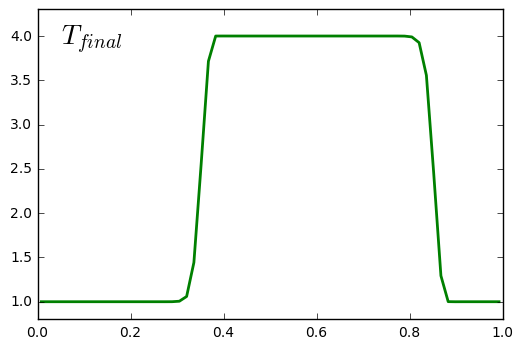

In [57]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import sys
import matplotlib.animation as manimation
import os

def get_curves(curve1,col=1):
    data_end = np.loadtxt(curve1,dtype='f4')
    x_end= data_end[:,0]
    #rho_end = data_end[:,col]
    #x, y = zip(*sorted(zip(x_end,rho_end),key = lambda x: x[0]))
    
    if col==1:
         rho_end = data_end[:,col]
         x, y = zip(*sorted(zip(x_end,rho_end),key = lambda x: x[0]))
    elif col == 2:
         rho = data_end[:,1]
         rhou = data_end[:,2]
         rho_end = rhou/rho
         x, y = zip(*sorted(zip(x_end,rho_end),key = lambda x: x[0]))
    elif col == 3:
         rho = data_end[:,1]
         rhou = data_end[:,2]
         e = data_end[:,3]
         rho_end = (e-0.5*rhou*rhou/rho)*(1.4-1.0)
         x, y = zip(*sorted(zip(x_end,rho_end),key = lambda x: x[0]))
            
    return x, y

def get_labels(curve1,col=1):
    data_end = np.loadtxt(curve1)#,dtype='f4')
    #rho_end = data_end[:,col]
    #x, y = zip(*sorted(zip(x_end,rho_end),key = lambda x: x[0]))
    labels = data_end[:,0] #ithink
    
    return labels


def plot_curves(curve1,col=1,label='label'):
    """ function eats .dat files """
    #data_end = np.loadtxt(curve1,dtype='f4')
    #x_end= data_end[:,0]
    #rho_end = data_end[:,col]
    #x_end, rho_end = zip(*sorted(zip(x_end,rho_end),key = lambda x: x[0]))
    x_end, rho_end = get_curves(curve1,col)
    plt.plot(x_end,rho_end,marker='.',label=label)

    ymax = np.max(rho_end)
    ymin = np.min(rho_end)

    xmax = np.max(1)
    xmin = np.min(0)
    plt.axis([xmin,xmax,ymin,ymax])
    
    plt.show()

#plot_curves('../solver/outputs/nn_lim_modes_00002.dat',col=1)
#plot_curves('../solver/outputs/no_lim_modes_00002.dat',col=1)
#plot_curves('../solver/outputs/lim_tvd_modes_00002.dat',col=1)
x0,y0 = get_curves('../solver/outputs/sin32_modes_00000.dat',col=1)
x1, y1 = get_curves('../solver/outputs/sin32_modes_00011.dat',col=1)
x2, y2 = get_curves('../solver/outputs/sin32_tvd_modes_00011.dat',col=1)
x3, y3 = get_curves('../solver/outputs/sin32_min_modes_00011.dat',col=1)
x4, y4 = get_curves('../solver/outputs/sin32_nolim_modes_00011.dat',col=1)

x7, y7 = get_curves('../solver/new_dataset/testsin_modes_00011.dat',col=1)

#x5, y5 = get_curves('../solver/outputs/sin32_NN2_modes_00001.dat',col=1)
#x3,y3 = get_curves('../solver/outputs/sine_tvd_m10_modes_00021.dat',col=1)
#x4, y4 = get_curves('../solver/outputs/sine_modes_00005.dat',col=1)
#x5, y5 = get_curves('../solver/outputs/sine_modes_00021.dat',col=1)

x0,y0 = get_curves('../solver/paper_runs/blob_o2_nol_64_modes_00000.dat',col=1)
xtvd,ytvd = get_curves('../solver/paper_runs/hat64n2tvd_modes_00002.dat',col=1)
xno,yno = get_curves('../solver/paper_runs/hat64n2nolim_modes_00002.dat',col=1)
xmin,ymin = get_curves('../solver/paper_runs/blob_o2_nn_64_modes_00045.dat',col=1)
xnn,ynn = get_curves('../solver/paper_runs/blob_o2_nol_64_modes_00020.dat',col=1)

#plt.plot(x0,y0,label='$T_{initial}$')#,linestyle='--')
#plt.plot(xnn,ynn,label='NN $T = 1$',color='black', linewidth=2)
plt.plot(xtvd,ytvd,label='TVD M=5 $T = 1$',color='green', linewidth=2)
#plt.plot(xmin,ymin,label='Minmod $T = 1$',color='red', linewidth=2)
#plt.plot(xno,yno,label='no limiter $T = 1$',color='green', linewidth=2)#, linestyle ='-')#, marker='s', color='purple')
#plt.plot(xno,100.*(np.array(yno) - np.array(ynn)),label='no limiter $T = 1$', linestyle ='-')#, marker='s', color='purple')
plt.ylim([0.8,4.3])
plt.text(0.05,3.9,'$T_{final}$',fontsize=20)
#plt.plot(x7,y7,label='NN3',color='pink', linewidth=1)
#plt.ylim([3,4.55])
#plt.xlim([0.2,0.4])
#plt.legend(loc='best')
#plt.savefig('blast.eps',dpi=1000)
#np.max(np.array(yno) - np.array(ynn))
plt.savefig('tf_c.eps')


In [3]:
# from curve, generate features for training/test set
import re

def get_parameters(filename):
    #"ic4nx8n3bc2_modes_00068test"
    print filename
    parameters = re.findall(r'[0-9]+',filename)
    nx = parameters[1]
    n = parameters[2]
    bc = parameters[3]
    print parameters
    return int(bc), int(nx), int(n)

def get_quantities(curve1,M,n):
    dataset = []
    data_end = np.loadtxt(curve1,dtype='f4')
    bc, n_elem, n = get_parameters(curve1)
    x = data_end[:,0]
    #n_elem = len(x)
    h = 1./float(n_elem)
    #rho = data_end[:,1]
    #print rho
    #n = (len(data_end[0,:])-1)/3 #number of modes...
    #print data_end[0,:]
    for cell in range(n_elem):
        # boundary conditions (right now it's a bit fudged)
        if (bc == 1):
            if cell == 0:
                cell_m = n_elem-1
            else:
                cell_m = cell - 1
            if cell == n_elem-1:
                cell_p = 1
            else:
                cell_p = cell+1
        elif(bc == 2):
            if cell == 0:
                cell_m = 0
            else:
                cell_m = cell - 1
            if cell == n_elem-1:
                cell_p = n_elem-1
            else:
                cell_p = cell+1
        else:
            if cell == 0:
                cell_m = 0#n_elem-1
            else:
                cell_m = cell - 1
            if cell == n_elem-1:
                cell_p = n_elem-1
            else:
                cell_p = cell+1
            
        u_c = reconstruct_cell(data_end[cell,0:3*n],n,0.5)
        u_m = reconstruct_cell(data_end[cell_m,0:3*n],n,0.5)
        u_p = reconstruct_cell(data_end[cell_p,0:3*n],n,0.5)
        u_max = np.max(([u_c,u_m,u_p]))
        u_min = np.min(([u_c,u_m,u_p]))

        
        du_m = (u_c - u_m)/h
        du_p = (u_p - u_c)/h 
        u_f_p = reconstruct_cell(data_end[cell,0:3*n],n,1)  
        u_f_m = reconstruct_cell(data_end[cell,0:3*n],n,-1)
        
        
        u_m_f_p = reconstruct_cell(data_end[cell_m,0:3*n],n,1)  
        u_p_f_m = reconstruct_cell(data_end[cell_p,0:3*n],n,-1)

        du = (u_p - u_m)/(2*h)

        xv = x[cell]
        label_hio = data_end[cell,1+3*n]
        
        label = is_there_a_shock((u_p-u_m)/(2.*h), 1*du_m, 1*du_p, M, h)
        
        dataset.append([xv,h, u_c, u_m,u_p, du, du_m, du_p, u_f_p, u_f_m, u_m_f_p, u_p_f_m, u_max, u_min, label_hio])
        
    return dataset

def is_there_a_shock(u_c, u_m,u_p, M, dx):
    # TVD limiter with M parameter for smoothness
    if (abs(u_c) < (M*dx**2)):
        label = 0.0 # no limiting
    else:
        u_min=minmod(u_c,u_m,u_p)
        if(u_min == u_c): #no limiting
            label = 0.0
        else:
            label = 1.0 # has to be limited
    return label

def minmod(a,b,c):
    s=np.sign(a)
    if np.sign(b) == s and np.sign(c) == s:
        minm = s*np.min([np.abs(a),np.abs(b),np.abs(c)])
    else:
        minm = 0.0
    return minm


def visualise_dataset(dataset):
    labels = []; xaxis = []; rhov = []; rhop = []

    #This is for manually removing some mislabels
    #for indx, entry in enumerate(dataset):
    #    if entry[0] <0.50:# and entry[0]>0.25:
    #        dataset[indx][-1] = 0.0
        #if entry[0] <0.8 and entry[0]>0.7:
        #    dataset[indx][-1] = 0.0

    for pt in dataset:
            labels.append(pt[len(pt)-1])
            xaxis.append(pt[0])
            rhov.append(pt[2])
            rhop.append(pt[7])

    plt.plot(xaxis,rhov)
    plt.plot(xaxis,np.array(labels)*(np.max(rhov)-np.min(rhov))/2.,linestyle='None',marker='*')
    plt.show()
    return xaxis, rhov


def visualise_dataset2(dataset,limdataset):
    labels = []; xaxis = []; rhov = []; rhop = []; rhoun = [];

    #This is for manually removing some mislabels
    #for indx, entry in enumerate(dataset):
    #    if entry[0] <0.50:# and entry[0]>0.25:
    #        dataset[indx][-1] = 0.0
        #if entry[0] <0.8 and entry[0]>0.7:
        #    dataset[indx][-1] = 0.0

    for pt,pt2 in zip(dataset,limdataset):
            labels.append(pt[len(pt)-1])
            xaxis.append(pt[0])
            rhov.append(pt[2])
            rhop.append(pt[7])
            rhoun.append(pt2[2])

    plt.plot(xaxis,rhov)
    plt.plot(xaxis,rhoun)
    plt.plot(xaxis,np.array(labels)*(np.max(rhov)-np.min(rhov))/2.,linestyle='None',marker='*')
    plt.show()
    return xaxis, rhov

../solver/new_dataset/ic1nx32n3bc1_modes_00055test.dat
['1', '32', '3', '1', '00055']


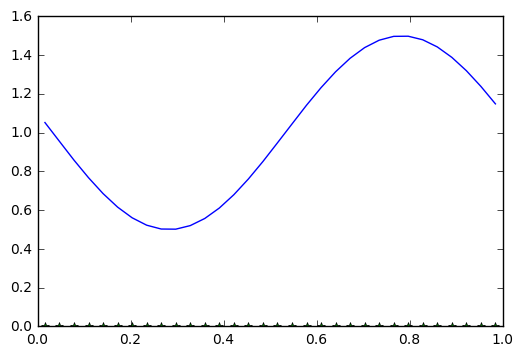

In [4]:
#dataset = get_quantities('../solver/outputs/smoothunsmooth_modes_00001.dat',100000.0,2)
#xaxis, rhov = visualise_dataset(dataset)
dataset = get_quantities('../solver/new_dataset/ic1nx32n3bc1_modes_00055test.dat',100000.0,2)
xaxis, rhov = visualise_dataset(dataset)

In [8]:
import csv
with open('dataset_new_20.4.18.csv', 'a') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';',
                           quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for point in dataset:
        spamwriter.writerow(point)

After training a network, loads the weights and performs the prediction.

This is by performing the following operation:

$$f_n(...f_1(w_1*(f_0(w_0\vec{x})+ b_0)+b_1)$$

where $f_0 ... f_{n-1}$ are Rectified linear units, and $f_n()$ the softmax function.

In [9]:
# load weights and biases
MODEL_PATH = '../neural net/'

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x-np.max(x))
    return e_x / np.sum(e_x)

def relu(x):
    r = np.zeros(x.shape)
    for indx, a in enumerate(x):
        r[indx] = max(a,0)
    return r

def load_neural_net():
    w = []; b = []
    layers = 5 # TODO: this is fudged
    for layer in range(layers):
        w.append(np.transpose(np.loadtxt(MODEL_PATH+'w'+str(layer)+'_7.2.18_.txt',dtype=np.float32,delimiter=';')))
        temp = np.array(np.loadtxt(MODEL_PATH+'b'+str(layer)+'_7.2.18_.txt',dtype=np.float32,delimiter=';'))
        b.append(temp.reshape(temp.shape[0],1))
    return w, b

def make_prediction(w,b,x):
    out = relu(np.matmul(w[4],relu(np.matmul(w[3],relu(np.matmul(w[2],relu(np.matmul(w[1],relu(np.matmul(w[0],x)+b[0]))+b[1]))+b[2]))+b[3]))+b[4])
    probs = softmax(out) # convert scores into probability estimates
    probas = probs.flatten()
    # attribute label
    #print probas
    if probas[0] <= 0.5:
        label = 1
    if probas[0] > 0.5:
        label = 0
    return label

# generate features from the curve, make the prediction
w, b = load_neural_net()
preds = []; xl = []
# as an example, it uses the previously loaded curve
for point in range(len(dataset)):    
    x = np.array(dataset[point][1:9]).reshape(8,1)
    preds.append(make_prediction(w,b,x))


IOError: [Errno 2] No such file or directory: '../neural net/w0_7.2.18_.txt'

NameError: name 'preds' is not defined

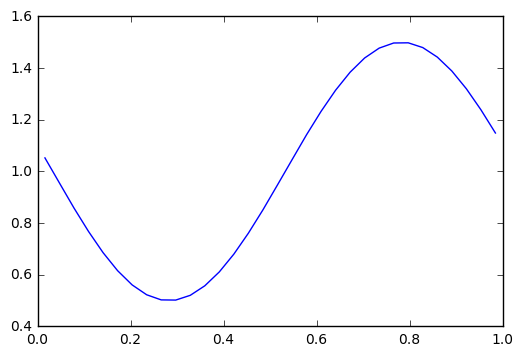

In [7]:
# plot the prediction and what the TVD limiter has flagged
plt.plot(xaxis,rhov)
#plt.plot(xaxis,np.array(labels)*(np.max(rhov)-np.min(rhov))/2.,linestyle='None',marker='*',label='TVD')
plt.plot(xaxis,np.array(preds)*(np.max(rhov)-np.min(rhov))/2.,linestyle='None',marker='.',label='NN')
plt.legend(loc='best')
plt.show()

9.56114381552e-05
0.000783629715443
0.00682063400745
0.132548
0.356032
0.601256
3.3021e-05
0.000164092
0.00123805
test 0.0105108581483
test 0.00205896422267
test 0.000379276461899
test tv 0.00882349163294
test nolim 0.00241686403751
test 0.000625899061561
test 0.000139769166708


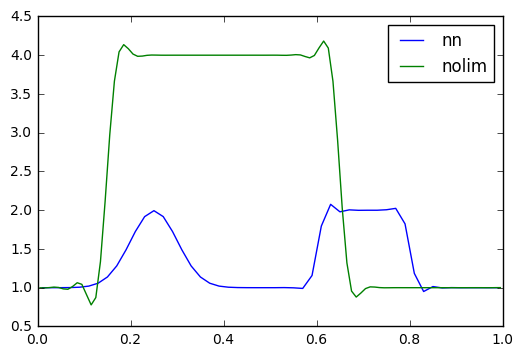

In [10]:
x0,r0 = get_curves('../solver/outputs/sine_o2_32_modes_00000.dat',col=1)
x0,nolim = get_curves('../solver/outputs/sine_o2_32_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(nolim)))/len(x0)

x0,r0 = get_curves('../solver/outputs/sine_o2_16_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sine_o2_16_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)


x0,r0 = get_curves('../solver/outputs/sine_o2_8_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sine_o2_8_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)

x0,r0 = get_curves('../solver/outputs/sine_o2_32_tvd_modes_00000.dat',col=1)
x0,tvd = get_curves('../solver/outputs/sine_o2_32_tvd_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(tvd)))

x0,r0 = get_curves('../solver/outputs/sine_o2_16_tvd_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sine_o2_16_tvd_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))

x0,r0 = get_curves('../solver/outputs/sine_o2_8_tvd_modes_00000.dat',col=1)
x1,r1 = get_curves('../solver/outputs/sine_o2_8_tvd_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))

x0,r0 = get_curves('../solver/outputs/sine_o3_32_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sine_o3_32_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))

x0,r0 = get_curves('../solver/outputs/sine_o3_16_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sine_o3_16_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))


x0,r0 = get_curves('../solver/outputs/sine_o3_8_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sine_o3_8_modes_00021.dat',col=1)
print np.sum(abs(np.array(r0)-np.array(r1)))



x0,r0 = get_curves('../solver/outputs/sin16_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin16_modes_00011.dat',col=1)
print 'test', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)

x0,r0 = get_curves('../solver/outputs/sin32_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin32_modes_00011.dat',col=1)
print 'test', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)


x0,r0 = get_curves('../solver/outputs/sin64_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin64_modes_00011.dat',col=1)
print 'test', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)



x0,r0 = get_curves('../solver/outputs/sin8_tvd100_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin8_tvd100_modes_00011.dat',col=1)
print 'test tv', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)

x0,r0 = get_curves('../solver/outputs/sin16_tvd100_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin16_tvd100_modes_00011.dat',col=1)
print 'test nolim', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)

x0,r0 = get_curves('../solver/outputs/sin32_tvd100_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin32_tvd100_modes_00011.dat',col=1)
print 'test', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)

x0,r0 = get_curves('../solver/outputs/sin64_tvd100_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sin64_tvd100_modes_00011.dat',col=1)
print 'test', np.sum(abs(np.array(r0)-np.array(r1)))/len(x0)

x1,r11 = get_curves('../solver/outputs/heavy32_NN_modes_00001.dat',col=1)
xnn,nn = get_curves('../solver/outputs/heavy32_NN_modes_00011.dat',col=1)

xtv,tvd = get_curves('../solver/runs/ic2_NOL_100_2_5.11.18_modes_00010.dat',col=1)
x0,nl = get_curves('../solver/runs/ic2_NNM_50_3_new_modes_00011.dat',col=1)
#print np.sum(abs(np.array(r0)-np.array(r1)))

#x0,r0 = get_curves('../solver/outputs/sine_o2_16_nn_modes_00000.dat',col=1)#
#x0,r1 = get_curves('../solver/outputs/sine_o2_16_nn_modes_00021.dat',col=1)
#print np.sum(abs(np.array(r0)-np.array(r1)))

#x0,r0 = get_curves('../solver/outputs/sine_o2_8_nn_modes_00000.dat',col=1)
#x0,r1 = get_curves('../solver/outputs/sine_o2_8_nn_modes_00021.dat',col=1)
#print np.sum(abs(np.array(r0)-np.array(r1)))

#plt.plot(x1,r1,label='nn_2')
#plt.plot(x0,nn,label='nn_2')
#plt.plot(xnn,nn,label='nn')
plt.plot(x0,nl,label='nn')
plt.plot(xtv,tvd,label='nolim')
#plt.plot(x1,nolim,label='nolim_2')
plt.legend(loc='best')

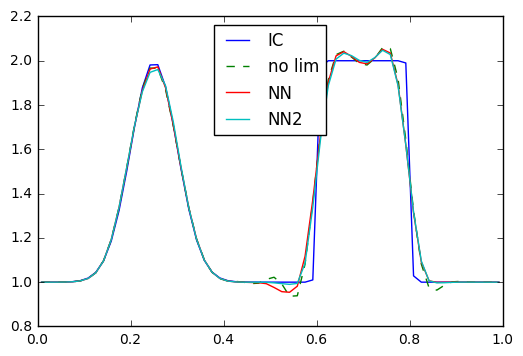

In [92]:
folder = '../solver/experiments/09.11_l4_w5.0_datadataset_new_20.4.18_normTrue_nNeurons192/'
xtv,tvd = get_curves(folder+'ic3_MIN_60_2_5.11.18_modes_00001.dat',col=1)
x0,nl = get_curves(folder+'ic3_NOL_60_2_5.11.18_modes_00011.dat',col=1)
x1,n2 = get_curves(folder+'ic3_NNS_60_2_5.11.18_modes_00011.dat',col=1)
x1,n3 = get_curves(folder+'ic3_NNM_60_2_5.11.18_modes_00011.dat',col=1)
labs = get_labels(folder+'ic3_NNM_60_2_5.11.18_modes_00011_labels.dat')
labs2 = get_labels(folder+'ic3_NNS_60_2_5.11.18_modes_00011_labels.dat')
#x1,n4 = get_curves('../solver/runs/ic2_MIN_40_2_5.11.18_modes_00011.dat',col=1)

plt.plot(xtv,tvd,label='IC')
plt.plot(x0,nl,label='no lim',linestyle='dashed')
plt.plot(x1,n2,label='NN')
plt.plot(x1,n3,label='NN2')
#plt.plot(x1,labs, marker ='o',label='acts')

#plt.plot(x1,labs2, marker ='o',label='acts2')
#plt.plot(x1,n4,label='TVD M = 0')
plt.legend(loc='best')
#plt.savefig('hat_tvd_stff.eps', format='eps', dpi=1000, bbox_inches='tight')


In [81]:
import os
from collections import defaultdict

def get_error(filename):
    data0 = np.loadtxt(filename+'_modes_00001.dat',dtype='f8')
    data1 = np.loadtxt(filename+'_modes_00011.dat',dtype='f8')
    error = 0
    #for cell in range(len(data0[:,0])):
    #print data1[cell,1]
    #error = error + np.abs(data0[cell,1]-data1[cell,1])
    
    return np.sum(np.abs(data0[:,1]-data1[:,1]))/float(len(data0[:,0]))
    
    

files = os.listdir('../solver/runs/')
file_names = [x.split('_')[0] for x in files]
file_names = list(set(file_names))
resolutions = [10, 20, 40, 80, 100]

for n in ['2','3']:
    print 'order: ',n
    errors = defaultdict(list)
    convs = defaultdict(list)
    for lim in ['HIO', 'MIN', 'XYZ', 'NNM']:
        print lim
        err = []
        resos = []
        for res in resolutions:
            filename = 'ic3_'+str(lim)+'_'+str(res)+'_'+n
            error = get_error('../solver/runs/'+filename)
            errors[lim].append(error)
            resos.append(res)
            print res, error
            try:
                conv=np.polyfit(np.log(np.array(resos)), np.log(errors[lim]), 1)
                convs[lim].append(conv[0])
            except:
                pass
            
    for i, res in enumerate(resos):
        print '%d & %f $\mid$ %0.1f & %f $\mid$ %0.1f & %f $\mid$ %0.1f & %f $\mid$ %0.1f \\\\ \hline'%( res, errors['XYZ'][i], -convs['XYZ'][i], errors['MIN'][i], -convs['MIN'][i], errors['HIO'][i], -convs['HIO'][i], errors['NNM'][i], -convs['NNM'][i])
        

order:  2
HIO
10 0.333484641118
20 0.170726383991
40 0.0626770452429
80 0.0288898934113
100 0.0230001929606
MIN
10 0.333484641118
20 0.170726383991
40 0.0626770452429
80 0.0288898934113
100 0.0230001929606
XYZ
10 0.164609040633
20 0.100032429267
40 0.0530349940234
80 0.0291319539622
100 0.0242463423208
NNM
10 0.29720003227
20 0.129081713573
40 0.0653997741242
80 0.0323029653746
100 0.0264393133287
10 & 0.164609 $\mid$ 0.4 & 0.333485 $\mid$ 0.2 & 0.333485 $\mid$ 0.2 & 0.297200 $\mid$ 0.3 \\ \hline
20 & 0.100032 $\mid$ 0.7 & 0.170726 $\mid$ 1.0 & 0.170726 $\mid$ 1.0 & 0.129082 $\mid$ 1.2 \\ \hline
40 & 0.053035 $\mid$ 0.8 & 0.062677 $\mid$ 1.2 & 0.062677 $\mid$ 1.2 & 0.065400 $\mid$ 1.1 \\ \hline
80 & 0.029132 $\mid$ 0.8 & 0.028890 $\mid$ 1.2 & 0.028890 $\mid$ 1.2 & 0.032303 $\mid$ 1.1 \\ \hline
100 & 0.024246 $\mid$ 0.8 & 0.023000 $\mid$ 1.2 & 0.023000 $\mid$ 1.2 & 0.026439 $\mid$ 1.0 \\ \hline
order:  3
HIO
10 0.307900944582
20 0.0752378526476
40 0.0330819661278
80 0.0173522699545
100 

/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/skynet/anaconda/lib/python2

80 0.0324426206308
100 0.0264011330781
10 & 0.054616 $\mid$ 0.6 & 0.339167 $\mid$ 0.2 & 0.307901 $\mid$ 0.3 & 0.302808 $\mid$ 0.3 \\ \hline
20 & 0.032699 $\mid$ 0.7 & 0.172127 $\mid$ 1.0 & 0.075238 $\mid$ 2.0 & 0.130308 $\mid$ 1.2 \\ \hline
40 & 0.022798 $\mid$ 0.6 & 0.063178 $\mid$ 1.2 & 0.033082 $\mid$ 1.6 & 0.065783 $\mid$ 1.1 \\ \hline
80 & 0.013853 $\mid$ 0.6 & 0.029148 $\mid$ 1.2 & 0.017352 $\mid$ 1.4 & 0.032443 $\mid$ 1.1 \\ \hline
100 & 0.011725 $\mid$ 0.7 & 0.023202 $\mid$ 1.2 & 0.014379 $\mid$ 1.3 & 0.026401 $\mid$ 1.0 \\ \hline


In [11]:
x = 'aa_a'
x.split('_')


hat16n2min
0.2684974819421768
hat16n2nolim
0.2519123740494251
hat16n2tvd
0.2732083722949028
hat32n2lmin
0.15210562571883202
hat32n2lnn
0.15400075912475586
hat32n2lno
0.17016678862273693
hat32n2ltvd
0.15268373861908913
hat32n2min
0.15210562571883202
hat32n2nn
0.15502068400382996
hat32n2nolim
0.17016678862273693
hat32n2tvd
0.15268373861908913
hat64n2min
0.08678078837692738
hat64n2nn
0.09082738868892193
hat64n2nolim
0.10190631821751595
hat64n2tvd
0.08687741216272116
hat8n2min
0.6117825210094452
hat8n2nolim
0.458938404917717
hat8n2tvd
0.4935518279671669

NameError: name 'hat16n2min' is not defined

min_2
-0.927254891838
nn_2
-0.70059679675
no_lim_2
-0.707914360865
tvd_2
-0.835790094268


[]

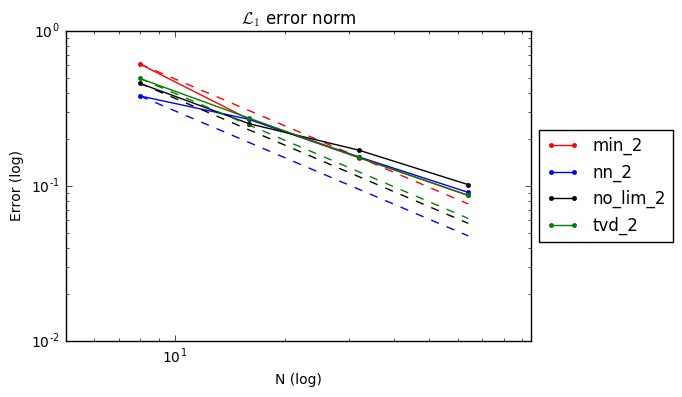

In [14]:
gridsizes = [8,16,32,64]

error = {}
error['no_lim_2']=[0.458938404917717,0.2519123740494251,0.17016678862273693,0.10190631821751595]
error['tvd_2']=[0.4935518279671669,0.2732083722949028,0.15268373861908913, 0.08687741216272116]
error['min_2']=[0.6117825210094452,0.2684974819421768,0.15210562571883202,0.08678078837692738]
error['nn_2']=[0.38075999915599823, 0.26867416128516197,0.15400075912475586,0.09082738868892193]

#error['tvd_2_5']=[0.008823491632938385, 0.002416864037513733,0.0006258990615606308, 0.00013976916670799255]
#error['no_lim_3']=[0.00015475600957870483,1.025572419166565e-05,1.0319054126739502e-06, 3.1385570764541626e-07]

name2order = {'no_lim_2':1,'tvd_2':1,'nn_2':1,'no_lim_3':1,'min_2':1,'tvd_2_5':1}

colours = ['red','blue','black','green','violet','yellow']
for i, ordr in enumerate(sorted(error.keys())):
    err = error[ordr]
    order = name2order[ordr]
    conv=np.polyfit(np.log(np.array(gridsizes)), np.log(err), 1)
    print ordr
    print conv[0]
    plt.loglog(gridsizes,err,label= ordr,marker='.', color=colours[i])
    plt.loglog(gridsizes,(err[0]/float(gridsizes[0]**(-order)))*np.power(np.array(gridsizes), -float(int(order))),linestyle='--',color=colours[i])

plt.xlabel('N (log)')
plt.ylabel('Error (log)')
plt.xlim([5, 95])
plt.title('$\mathcal{L}_1$ error norm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('vortex_t10_l1.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.plot()

[]

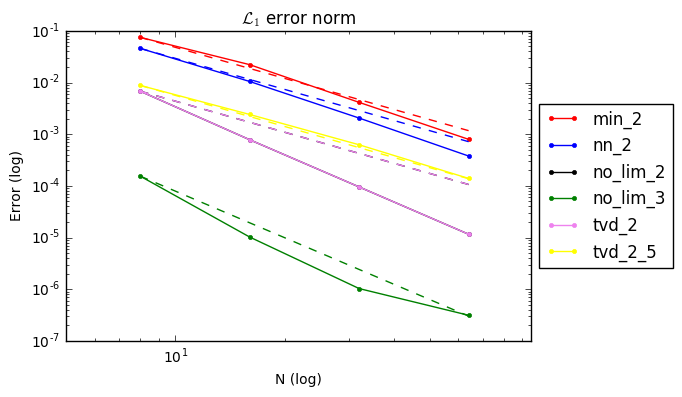

In [15]:
gridsizes = [8,16,32,64]

error = {}
error['no_lim_2']=[0.0068206340074539185,0.0007836297154426575,9.561143815517426e-05,1.161918044090271e-05]
error['tvd_2']=[0.0068206340074539185,0.0007836297154426575,9.561143815517426e-05, 1.161918044090271e-05]
error['min_2']=[0.07515697926282883,0.022252004593610764, 0.004142114892601967,0.0007978137582540512]
error['nn_2']=[0.045977115631103516, 0.01051085814833641,0.0020589642226696014,0.00037927646189928055]

error['tvd_2_5']=[0.008823491632938385, 0.002416864037513733,0.0006258990615606308, 0.00013976916670799255]
error['no_lim_3']=[0.00015475600957870483,1.025572419166565e-05,1.0319054126739502e-06, 3.1385570764541626e-07]

name2order = {'no_lim_2':2,'tvd_2':2,'nn_2':2,'no_lim_3':3,'min_2':2,'tvd_2_5':2}

colours = ['red','blue','black','green','violet','yellow']
for i, ordr in enumerate(sorted(error.keys())):
    err = error[ordr]
    order = name2order[ordr]
    conv=np.polyfit(np.log(np.array(gridsizes)), np.log(err), 1)
    plt.loglog(gridsizes,err,label= ordr,marker='.', color=colours[i])
    plt.loglog(gridsizes,(err[0]/float(gridsizes[0]**(-order)))*np.power(np.array(gridsizes), -float(int(order))),linestyle='--',color=colours[i])

plt.xlabel('N (log)')
plt.ylabel('Error (log)')
plt.xlim([5, 95])
plt.title('$\mathcal{L}_1$ error norm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('vortex_t10_l1.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.plot()


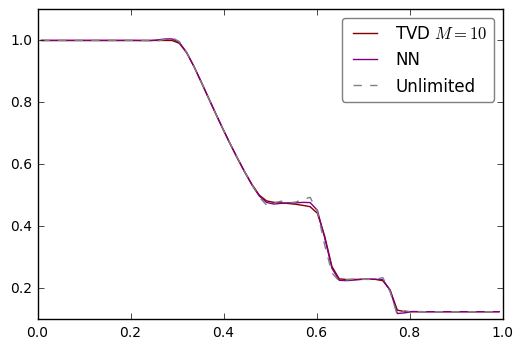

In [16]:

#x0,r0 = get_curves('../solver/outputs/sod_o2_32_nn_modes_00000.dat',col=1)
x0,r1 = get_curves('../solver/outputs/sod_o2_64_nn_modes_00015.dat',col=1)
x0,r2 = get_curves('../solver/outputs/sod_o2_64_modes_00015.dat',col=1)
x0,r3 = get_curves('../solver/outputs/sod_o2_64_tvd_modes_00015.dat',col=1)

#plt.title('Pressure')

plt.plot(x0,r3,label='TVD $M = 10$', color='maroon',linewidth=1)
plt.plot(x0,r1,label='NN', color='purple',linewidth=1)
plt.plot(x0,r2,label='Unlimited', color='grey',linestyle='dashed',linewidth=1)
#plt.plot(x4,r4,label='Minmod', color='red',linewidth=2)
#plt.plot(x5,r5,label='HIO', color='green',linewidth=2)

#plt.ylim([0.9,1.1])
#plt.xlim([0.25,0.4])
plt.legend(loc='upper right',fancybox=True,framealpha=0.5)


plt.savefig('density_shock.eps', format='eps', dpi=1000, bbox_inches='tight')

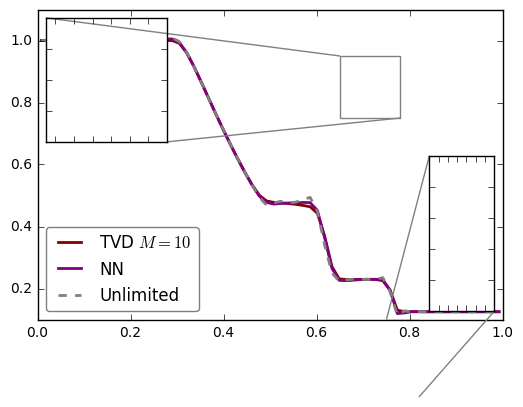

In [17]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.plot(x0,r3,label='TVD $M = 10$', color='maroon',linewidth=2)
ax.plot(x0,r1,label='NN', color='purple',linewidth=2)
ax.plot(x0,r2,label='Unlimited', color='grey',linestyle='dashed',linewidth=2)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.0, loc=4) # zoom-factor: 2.5, location: upper-left
axins.plot(x0,r3,label='TVD $M = 10$', color='maroon',linewidth=2)
axins.plot(x0,r1,label='NN', color='purple',linewidth=2)
axins.plot(x0,r2,label='Unlimited', color='grey',linestyle='dashed',linewidth=2)
x1, x2, y1, y2 =0.75, 0.82,-0.15, 0.1 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)

axins2 = zoomed_inset_axes(ax, 2.0, loc=2) # zoom-factor: 2.5, location: upper-left
axins2.plot(x0,r3,label='TVD $M = 10$', color='maroon',linewidth=2)
axins2.plot(x0,r1,label='NN', color='purple',linewidth=2)
axins2.plot(x0,r2,label='Unlimited', color='grey',linestyle='dashed',linewidth=2)
x1, x2, y1, y2 = 0.65, 0.78,0.75, 0.95 # specify the limits
axins2.set_xlim(x1, x2) # apply the x-limits
axins2.set_ylim(y1, y2) # apply the y-limits
plt.yticks(visible=False)
plt.xticks(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
mark_inset(ax, axins2, loc1=2, loc2=4, fc="none", ec="0.5")
ax.legend(loc='lower left',fancybox=True,framealpha=0.5)
plt.savefig('velocity_fancy_zoom23.eps', format='eps', dpi=1000, bbox_inches='tight')

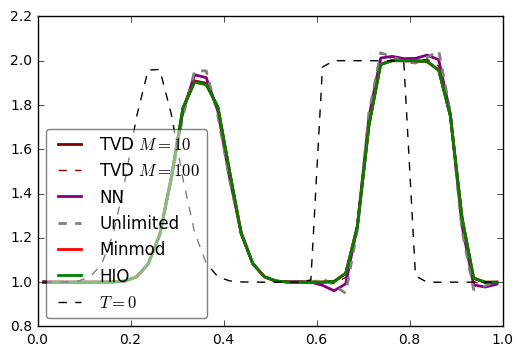

In [18]:
#x0,r0 = get_curves('../solver/outputs/sod_o2_32_nn_modes_00000.dat',col=1)
#x0,r1 = get_curves('../solver/paper_runs/sod_modes_00011.dat',col=1)
#x0,r2 = get_curves('../solver/unlimited_dataset/ic7_nn_80_2_modes_00011.dat',col=1)
x3,r3 = get_curves('../solver/runs/ic7_XYZ_40_2_modes_00011.dat',col=1)
x1,r1 = get_curves('../solver/unlimited_dataset/gaussian_tvd_40_3_modes_00011.dat',col=1)
x4,r4 = get_curves('../solver/unlimited_dataset/gaussian_min_40_3_modes_00011.dat',col=1)
x5,r5 = get_curves('../solver/unlimited_dataset/gaussian_hio_40_3_modes_00011.dat',col=1)


x0,r0 = get_curves('../solver/runs/ic3_NNM2_40_2_modes_00001.dat',col=1)
x0,r2 = get_curves('../solver/runs/ic3_NNMother_40_2_modes_00002.dat',col=1)
x3,r3 = get_curves('../solver/runs/ic3_XYZ_40_2_modes_00002.dat',col=1)
x1,r1 = get_curves('../solver/runs/ic3_TVD_40_2_modes_00002.dat',col=1)
x1m,r1m = get_curves('../solver/runs/ic3_TVDm100_40_2_modes_00002.dat',col=1)
x4,r4 = get_curves('../solver/runs/ic3_MIN_40_2_modes_00002.dat',col=1)
x5,r5 = get_curves('../solver/runs/ic3_HIO_40_2_modes_00002.dat',col=1)

#plt.title('Pressmaure')

plt.plot(x1,r1,label='TVD $M = 10$', color='maroon',linewidth=2)
plt.plot(x1m,r1m,label='TVD $M = 100$', color='maroon',linewidth=1, linestyle='dashed')
plt.plot(x0,r2,label='NN', color='purple',linewidth=2)
plt.plot(x3,r3,label='Unlimited', color='grey',linestyle='dashed',linewidth=2)
plt.plot(x4,r4,label='Minmod', color='red',linewidth=2)
plt.plot(x5,r5,label='HIO', color='green',linewidth=2)

plt.plot(x0,r0,label='$T = 0$', linestyle='dashed', color ='black')
#plt.ylim([2.5,4.15])
#plt.xlim([0.4,0.7])
#plt.annotate('order = 2')
#plt.plot(x0,np.abs(np.array(r2)-np.array(r3)),label='tvd')
plt.legend(loc='lower left',fancybox=True,framealpha=0.5)
#np.max(np.abs(np.array(r2)-np.array(r3)))

plt.savefig('o3_hat_n40_t02_test.eps', format='eps', dpi=1000, bbox_inches='tight')

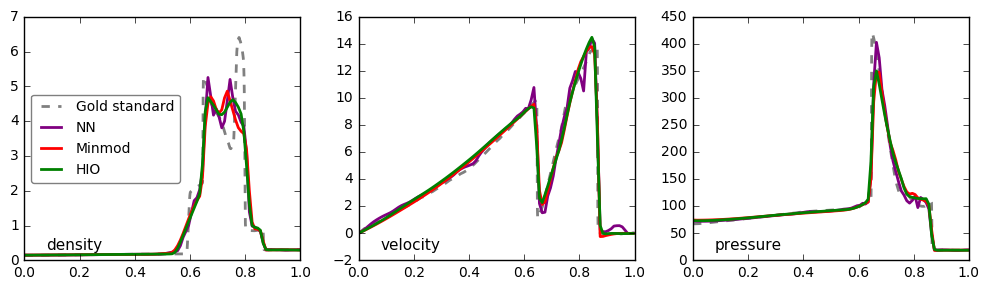

In [19]:

f = plt.figure(figsize=(10,3))
ax = []
text=['density','velocity','pressure']
for i in [1,2,3]:
    plt.subplot(1, 3, i)
    tslice = '00039'
    cols = i
    order = 3
    x0,r0 = get_curves('../solver/runs/ic5_HIO_1000_'+str(order)+'_modes_' + tslice + '.dat',col=cols)
    x1,r1 = get_curves('../solver/runs/ic5_NNS_100_'+str(order)+'_modes_' + tslice + '.dat',col=cols)
    x2,r2 = get_curves('../solver/runs/ic5_MIN_100_'+str(order)+'_modes_' + tslice + '.dat',col=cols)
    x3,r3 = get_curves('../solver/runs/ic5_HIO_100_'+str(order)+'_modes_' + tslice + '.dat',col=cols)
    #xn,rn = get_curves('../solver/runs/ic5_XYZ_100_'+str(order)+'_modes_' + tslice + '.dat',col=cols)
    #plt.plot(x0,r0,label='TVD $M = 10$', color='maroon',linewidth=2)
    #plt.plot(x1,r1,label='TVD $M = 10$', color='maroon',linewidth=1)
    #plt.plot(x2,r2,label='TVD $M = 10$', color='maroon',linewidth=1)
    #plt.plot(x3,r3,label='TVD $M = 10$', color='maroon',linewidth=1)

    ax.append(f.add_subplot(1,3,i))

    #plt.plot(x1,r1,label='TVD $M = 10$', color='maroon',linewidth=2)
    #plt.plot(x1m,r1m,label='TVD $M = 100$', color='maroon',linewidth=1, linestyle='dashed')
    ax[i-1].plot(x0,r0,label='Gold standard', color='grey',linestyle='dashed',linewidth=2)
    ax[i-1].plot(x1,r1,label='NN', color='purple',linewidth=2)
    ax[i-1].plot(x2,r2,label='Minmod', color='red',linewidth=2)
    ax[i-1].plot(x3,r3,label='HIO', color='green',linewidth=2)
    ax[i-1].text(0.08, 0.03, text[i-1],
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax[i-1].transAxes,
        color='black', fontsize=11)
    #plt.plot(xn,rn,label='No limiter', color='black',linewidth=1)

plt.tight_layout()
ax[0].legend(loc='center left',fancybox=True,framealpha=0.5,fontsize=10)
#plt.show()

#plt.savefig('o2_blast.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.savefig('o3_blast.eps', format='eps', dpi=1000, bbox_inches='tight')

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ic2nx16n2bc1_modes_00001_unlim.dat
['2', '16', '2', '1', '00001']


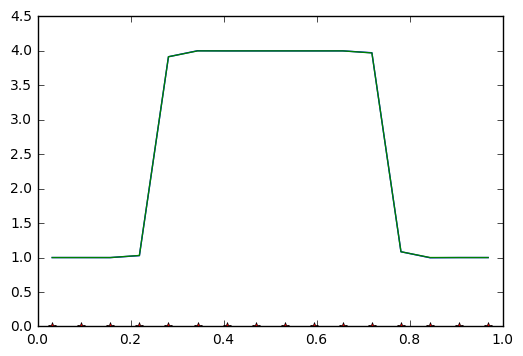

n
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ic2nx16n2bc1_modes_00002_unlim.dat
['2', '16', '2', '1', '00002']


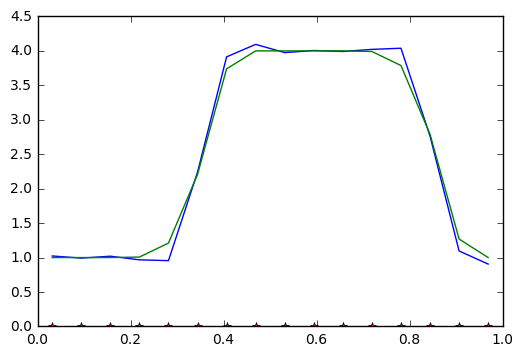

n
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ic2nx16n2bc1_modes_00003_unlim.dat
['2', '16', '2', '1', '00003']


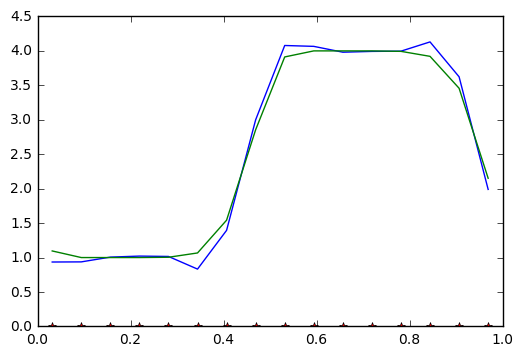

In [ ]:
#dataset = get_quantities('../solver/outputs/smoothunsmooth_modes_00001.dat',100000.0,2)
#xaxis, rhov = visualise_dataset(dataset)
import csv


# idea was to include flux as a feature too, but all the ics we are using are lin advection with a = 1.0

def get_quantities2(curve1,curve2,labelsf,path,M,n):
    dataset = []
    dataset2= []
    data_end = np.loadtxt(path+curve1,dtype='f4')
    datalim_end = np.loadtxt(path+curve2,dtype='f4')
    labels = np.loadtxt(path+labelsf,dtype='f4')
    print labels
    bc, n_elem, n = get_parameters(curve1)
    x = data_end[:,0]
    #n_elem = len(x)
    h = 1./float(n_elem)
    #rho = data_end[:,1]
    #print rho
    #n = (len(data_end[0,:])-1)/3 #number of modes...
    #print data_end[0,:]
    for cell in range(n_elem):
        # boundary conditions (right now it's a bit fudged)
        if (bc == 1):
            if cell == 0:
                cell_m = n_elem-1
            else:
                cell_m = cell - 1
            if cell == n_elem-1:
                cell_p = 1
            else:
                cell_p = cell+1
        elif(bc == 2):
            if cell == 0:
                cell_m = 0
            else:
                cell_m = cell - 1
            if cell == n_elem-1:
                cell_p = n_elem-1
            else:
                cell_p = cell+1
        else:
            if cell == 0:
                cell_m = 0#n_elem-1
            else:
                cell_m = cell - 1
            if cell == n_elem-1:
                cell_p = n_elem-1
            else:
                cell_p = cell+1
            
        u_c = data_end[cell,1]
        u_m = data_end[cell_m,1]#reconstruct_cell(data_end[cell_m,0:3*n],n,0.5)
        u_p = data_end[cell_p,1]#reconstruct_cell(data_end[cell_p,0:3*n],n,0.5)
        u_max = np.max(([u_c,u_m,u_p]))
        u_min = np.min(([u_c,u_m,u_p]))

        
        du_m = (u_c - u_m)/h
        du_p = (u_p - u_c)/h 
        u_f_p = reconstruct_cell(data_end[cell,0:3*n],n,1)  
        u_f_m = reconstruct_cell(data_end[cell,0:3*n],n,-1)
        
        
        u_m_f_p = reconstruct_cell(data_end[cell_m,0:3*n],n,1)  
        u_p_f_m = reconstruct_cell(data_end[cell_p,0:3*n],n,-1)

        du = (u_p - u_m)/(2*h)

        xv = x[cell]
        label_hio = labels[0]
        
        label = is_there_a_shock((u_p-u_m)/(2.*h), 1*du_m, 1*du_p, M, h)
        
        dataset.append([xv,h, u_c, u_m,u_p, du, du_m, du_p, u_f_p, u_f_m, u_m_f_p, u_p_f_m, u_max, u_min, label_hio])
        dataset2.append([xv,h, datalim_end[cell,1], u_m,u_p, du, du_m, du_p, u_f_p, u_f_m, u_m_f_p, u_p_f_m, u_max, u_min, label_hio])

    return dataset, dataset2


nall = [2,3]
nxall = [16,32,64,128]
icall = [2,9,1]

for ic in icall:
    for n in nall:
        for nx in nxall:
            for i in np.arange(1,9):
                path = '../solver/generate_dataset/09.11_l4_w5.0_datadataset_new_20.4.18_normTrue_nNeurons192/'
                unlim_name = 'ic'+str(ic)+'nx'+str(nx)+'n'+str(n)+'bc1_modes_0000'+str(i)+'_unlim.dat'
                lim_name = 'ic'+str(ic)+'nx'+str(nx)+'n'+str(n)+'bc1_modes_0000'+str(i)+'.dat'
                labels_name = 'ic'+str(ic)+'nx'+str(nx)+'n'+str(n)+'bc1_modes_0000'+str(i)+'_labels.dat'
                dataset, limited = get_quantities2(unlim_name, lim_name, labels_name,path,100000.0,n)
                xaxis, rhov = visualise_dataset2(dataset,limited)
                #print dataset
                k = raw_input()
                if (k=='y'):
                    with open('dataset2_12.11.18.csv', 'a') as csvfile:
                        spamwriter = csv.writer(csvfile, delimiter=';',
                                               quotechar='|', quoting=csv.QUOTE_MINIMAL)
                        for point in dataset:
                            spamwriter.writerow(point)
                else:
                    continue

In [ ]:
0.01**(2)

In [446]:
resl = [10, 20, 40, 100]
errsss= [0.01,0.003,0.00019,0.00007]
for i in range(5):
    print resl[0:i]
    conv=np.polyfit(np.log(np.array(resl[0:i+1])), np.log(errsss[0:i+1]), 1)
    print conv[0]

[]
-1.0
[10]
-1.73696559417
[10, 20]
-2.85892838561
[10, 20, 40]
-2.29278667885
[10, 20, 40, 100]
-2.29278667885


/Users/skynet/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [439]:
conv[0]

-2.6450206585101763